# WeatherPy
----

Analysis

1. The cities with the highest maximum temperatures do not seem to fall exactly ON the equator as I would've expected, but rather are located just below and just above the equator. The cities located right at 0 latitude dip a little bit in temperture. 

2. The trend observed here with regard to humidity I also found to be unexpected. I would've guessed that cities along the equator had a higher percentage of humidity, but the scatter plot indicates that cities between 40 and 80 degrees latitude have a much higher percentage of humidity overall. 

3. The scatter plot with regard to Wind Speed indicates that the wind gets stronger as we move further from the equator. This trend does align with what I would've anticipated.


In [ ]:
pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Take subset of cities list to make sure code running properly
#cities_sub = cities[0:50]
#print(cities_sub)

# Base URL for Open Weather Map API, units in Farenheit
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key + "&q="
#print(base_url)

# Create empty list to store relevant data from each city
city_data = []

# Print a statement showing API Calls have begun
print("Beginning Data Retrieval")
print("-----------------------------------------")

# Iterate through cities list, make API call for weather data, save data we want to city_data list
for city in cities:
    city_weather_data = requests.get(base_url + city).json()
    #print(json.dumps(city_weather_data, indent=4))
    try:
        print("Processing Record " + str(cities.index(city)+1) + " | " + str(city))
        city_lat = city_weather_data["coord"]["lat"]
        city_mtemp = city_weather_data["main"]["temp_max"]
        city_humidity = city_weather_data["main"]["humidity"]
        city_clouds = city_weather_data["clouds"]["all"]
        city_windspeed = city_weather_data["wind"]["speed"]
        city_data_dict = {"City": city, "Latitude": city_lat, "Max Temperature (F)": city_mtemp,
                          "Humidity (%)": city_humidity, "Cloudiness (%)": city_clouds,
                          "Wind Speed (mph)": city_windspeed}
        city_data.append(city_data_dict)
    except (KeyError):
        print("City Not Found. Skipping this City...")

print("------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------")
#print(city_data)

Beginning Data Retrieval
-----------------------------------------
Processing Record 1 | mataura
Processing Record 2 | moron
Processing Record 3 | hami
Processing Record 4 | busselton
Processing Record 5 | rabo de peixe
Processing Record 6 | olinda
Processing Record 7 | tasiilaq
Processing Record 8 | east london
Processing Record 9 | talcahuano
Processing Record 10 | hermanus
Processing Record 11 | faanui
Processing Record 12 | hobart
Processing Record 13 | taolanaro
City Not Found. Skipping this City...
Processing Record 14 | pevek
Processing Record 15 | jamestown
Processing Record 16 | kerema
Processing Record 17 | upernavik
Processing Record 18 | ushuaia
Processing Record 19 | vaini
Processing Record 20 | saint-joseph
Processing Record 21 | rikitea
Processing Record 22 | iquique
Processing Record 23 | amderma
City Not Found. Skipping this City...
Processing Record 24 | bay roberts
Processing Record 25 | san patricio
Processing Record 26 | aswan
Processing Record 27 | hanzhong
Proces

Processing Record 218 | bowen
Processing Record 219 | iquitos
Processing Record 220 | port macquarie
Processing Record 221 | khomutovka
Processing Record 222 | ardakan
Processing Record 223 | souris
Processing Record 224 | umzimvubu
City Not Found. Skipping this City...
Processing Record 225 | mackenzie
Processing Record 226 | smithers
Processing Record 227 | marsh harbour
Processing Record 228 | sorong
Processing Record 229 | ingham
Processing Record 230 | impfondo
Processing Record 231 | kyaikkami
Processing Record 232 | palu
Processing Record 233 | sobolevo
Processing Record 234 | louisbourg
City Not Found. Skipping this City...
Processing Record 235 | te anau
Processing Record 236 | arua
Processing Record 237 | chilia veche
Processing Record 238 | marawi
Processing Record 239 | la asuncion
Processing Record 240 | falealupo
City Not Found. Skipping this City...
Processing Record 241 | pochutla
Processing Record 242 | nemuro
Processing Record 243 | saint-augustin
Processing Record 24

Processing Record 447 | langsa
Processing Record 448 | vakhrushevo
Processing Record 449 | yenagoa
Processing Record 450 | tacna
Processing Record 451 | grand-lahou
Processing Record 452 | sete lagoas
Processing Record 453 | olafsvik
City Not Found. Skipping this City...
Processing Record 454 | angra
City Not Found. Skipping this City...
Processing Record 455 | nouakchott
Processing Record 456 | henties bay
Processing Record 457 | tevriz
Processing Record 458 | balabac
Processing Record 459 | khonuu
City Not Found. Skipping this City...
Processing Record 460 | aklavik
Processing Record 461 | candawaga
City Not Found. Skipping this City...
Processing Record 462 | ligayan
Processing Record 463 | quime
Processing Record 464 | willmar
Processing Record 465 | pasni
Processing Record 466 | marion
Processing Record 467 | antalaha
Processing Record 468 | kandiari
Processing Record 469 | ulladulla
Processing Record 470 | souillac
Processing Record 471 | chlorakas
City Not Found. Skipping this C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert our list of dictionaries, city_data, to a dataframe
city_weather_df = pd.DataFrame(city_data)
city_weather_df.head()

,City,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mataura,-46.19,52.00,90,3,3.00
1,moron,18.56,82.98,70,0,7.99
2,hami,42.84,25.65,48,100,1.59
3,busselton,-33.64,66.99,50,79,3.60
4,rabo de peixe,37.80,64.40,63,20,6.93


In [6]:
# Save to CSV
city_weather_df.to_csv("Output/city_weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

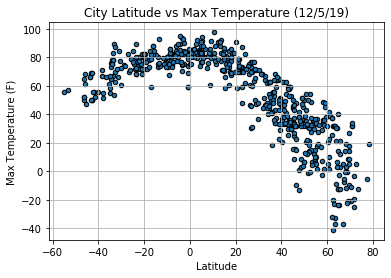

In [7]:
# Create scatter plot of City Latitude v Max Temp using dataframe
lat_mtemp_plot = city_weather_df.plot(x="Latitude", y="Max Temperature (F)", kind="scatter", facecolors="blue",
                                      edgecolors="black", title= "City Latitude vs Max Temperature (12/5/19)",
                                      grid=True)

# Save plot to png
plt.savefig("Output/lat_mtemp_plot.png")

plt.show()

#### Latitude vs. Humidity Plot

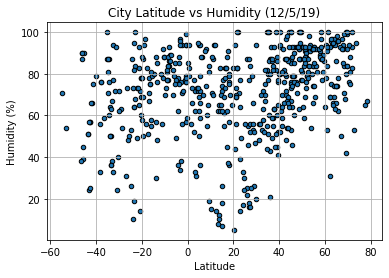

In [8]:
# Create scatter plot of City Latitude v Humidity using dataframe
lat_humidity_plot = city_weather_df.plot(x="Latitude", y="Humidity (%)", kind="scatter", facecolors="blue",
                                      edgecolors="black", title= "City Latitude vs Humidity (12/5/19)",
                                      grid=True)

# Save plot to png
plt.savefig("Output/lat_humidity_plot.png")

plt.show()

#### Latitude vs. Cloudiness Plot

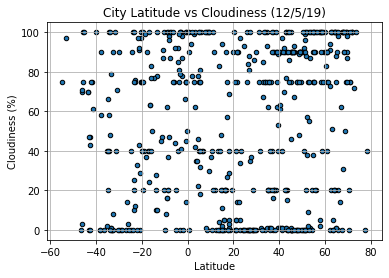

In [9]:
# Create scatter plot of City Latitude v Cloudiness using dataframe
lat_clouds_plot = city_weather_df.plot(x="Latitude", y="Cloudiness (%)", kind="scatter", facecolors="blue",
                                      edgecolors="black", title= "City Latitude vs Cloudiness (12/5/19)",
                                      grid=True)

# Save plot to png
plt.savefig("Output/lat_clouds_plot.png")

plt.show()

#### Latitude vs. Wind Speed Plot

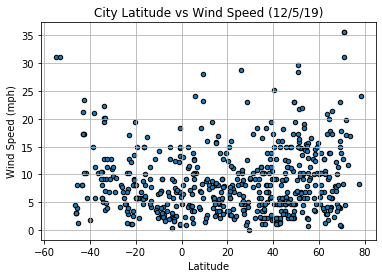

In [10]:
# Create scatter plot of City Latitude v Wind Speed using dataframe
lat_wspeed_plot = city_weather_df.plot(x="Latitude", y="Wind Speed (mph)", kind="scatter", facecolors="blue",
                                      edgecolors="black", title= "City Latitude vs Wind Speed (12/5/19)",
                                      grid=True)

# Save plot to png
plt.savefig("Output/lat_wspeed_plot.png")

plt.show()